<h1 style="font-size: 24px; text-align: center;"><b>EDA and Preprocessing<br>Machine Learning Assignment II<br>------------------------------------------------------------------------------------------------</b></h1>

#### <font color='blue'>Objective:
<p style="font-size: 18px;">The main objective of this project is to design and implement a robust data preprocessing
system that addresses common challenges such as missing values, outliers, inconsistent
formatting, and noise. By performing effective data preprocessing, the project aims to enhance
the quality, reliability, and usefulness of the data for machine learning.</p>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('Employee.csv')
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [5]:
print(f"\nFeature properties of the dataset:\n")
df.info()


Feature properties of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [6]:
df.shape

(148, 6)

In [7]:
dfc=df.copy()

In [8]:
# Encode Gender: Male = 1, Female = 0
dfc['Gender'] = dfc['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')

In [9]:
dfc.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [10]:
dfc.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,Female
1,Infosys,30.0,NaN,Mumbai,India,Female
2,TCS,35.0,2300.0,Calcutta,India,Female
3,Infosys,40.0,3000.0,Delhi,India,Female
4,TCS,23.0,4000.0,Mumbai,India,Female


In [11]:
dfc.describe()

,Age,Salary
count,130.000000,124.000000
mean,30.484615,5312.467742
std,11.096640,2573.764683
min,0.000000,1089.000000
25%,22.000000,3030.000000
50%,32.500000,5000.000000
75%,37.750000,8000.000000
max,54.000000,9876.000000


### Data Exploration: (Score : 2)
<p style="font-size: 18px;"> Explore the data, list down the unique values in each feature and find its length.
Perform the statistical analysis and renaming of the columns.</p>

In [13]:
# 1. Unique values and their counts
unique_values = {
    col: {"unique": df[col].unique().tolist(), "count": len(df[col].unique())} for col in df.columns
}

In [14]:
print("Unique Values and Counts:\n", unique_values)

Unique Values and Counts:
 {'Company': {'unique': ['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services', 'Congnizant', 'Infosys Pvt Lmt'], 'count': 7}, 'Age': {'unique': [20.0, 30.0, 35.0, 40.0, 23.0, nan, 34.0, 45.0, 18.0, 22.0, 32.0, 37.0, 50.0, 21.0, 46.0, 36.0, 26.0, 41.0, 24.0, 25.0, 43.0, 19.0, 38.0, 51.0, 31.0, 44.0, 33.0, 17.0, 0.0, 54.0], 'count': 30}, 'Salary': {'unique': [nan, 2300.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 1089.0, 1234.0, 3030.0, 3045.0, 3184.0, 4824.0, 5835.0, 7084.0, 8943.0, 8345.0, 9284.0, 9876.0, 2034.0, 7654.0, 2934.0, 4034.0, 5034.0, 8202.0, 9024.0, 4345.0, 6544.0, 6543.0, 3234.0, 4324.0, 5435.0, 5555.0, 8787.0, 3454.0, 5654.0, 5009.0, 5098.0, 3033.0], 'count': 41}, 'Place': {'unique': ['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin', nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], 'count': 12}, 'Country': {'unique': ['India'], 'count': 1}, 'Gender': {'unique': [0, 1], 'count': 2}}


In [15]:
# Display unique values and their lengths for each feature
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Feature: {col}\nUnique Values: {unique_vals}\nCount: {len(unique_vals)}\n")

Feature: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Count: 7

Feature: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Count: 30

Feature: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Count: 41

Feature: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Count: 12

Feature: Country
Unique Values: ['India']
Count: 1

Feature: Gender
Unique Values: [0 1]
Count: 2



##### statistical analysis

In [17]:
print("\nStatistical Analysis (Numeric Columns):\n", df.describe())


Statistical Analysis (Numeric Columns):
               Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [18]:
dfc.head(2)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,Female
1,Infosys,30.0,NaN,Mumbai,India,Female


##### Rename the columns : Here all the names are capitalising and changing 'Place' to 'City' 

In [20]:
dfc.columns = dfc.columns.str.upper()

In [21]:
dfc.head()

,COMPANY,AGE,SALARY,PLACE,COUNTRY,GENDER
0,TCS,20.0,NaN,Chennai,India,Female
1,Infosys,30.0,NaN,Mumbai,India,Female
2,TCS,35.0,2300.0,Calcutta,India,Female
3,Infosys,40.0,3000.0,Delhi,India,Female
4,TCS,23.0,4000.0,Mumbai,India,Female


In [22]:
#Changing the "Place" to "City"
dfc.rename(columns={'PLACE':'CITY'},inplace=True)
dfc.head()

,COMPANY,AGE,SALARY,CITY,COUNTRY,GENDER
0,TCS,20.0,NaN,Chennai,India,Female
1,Infosys,30.0,NaN,Mumbai,India,Female
2,TCS,35.0,2300.0,Calcutta,India,Female
3,Infosys,40.0,3000.0,Delhi,India,Female
4,TCS,23.0,4000.0,Mumbai,India,Female


### Data Cleaning: (Score : 2)

### Find the missing and inappropriate values, treat them appropriately

In [25]:
dfc.isnull().sum()

COMPANY     8
AGE        18
SALARY     24
CITY       14
COUNTRY     0
GENDER      0
dtype: int64

#### <font color='green'>Treating the missing values in Company with mode value 

In [27]:
#Imputation method
dfc['COMPANY'].fillna(dfc['COMPANY'].mode()[0],inplace=True)
dfc['COMPANY'].isnull().sum()

0

#### <font color='green'>Treating the missing values in City with mode value 

In [29]:
#Imputation method
dfc['CITY'].fillna(dfc['CITY'].mode()[0],inplace=True)
dfc['CITY'].isnull().sum()

0

#### <font color='green'>Treating the missing values in AGE with mode value 

In [31]:
#Imputation method
dfc['AGE'].fillna(dfc['AGE'].mode()[0],inplace=True)
dfc['AGE'].isnull().sum()

0

#### <font color='green'>Treating the missing values in SALARY with median value .

In [33]:
#Imputation method
dfc['SALARY'].fillna(dfc['SALARY'].mean(),inplace=True)
dfc['SALARY'].isnull().sum()

0

### Remove all duplicate rows.

In [35]:
dfc.duplicated().sum()

4

In [36]:
dfc.drop_duplicates(inplace=True)

In [37]:
dfc.duplicated().sum()

0

### Find the outliers.

Finding outliers using plotting a box plot

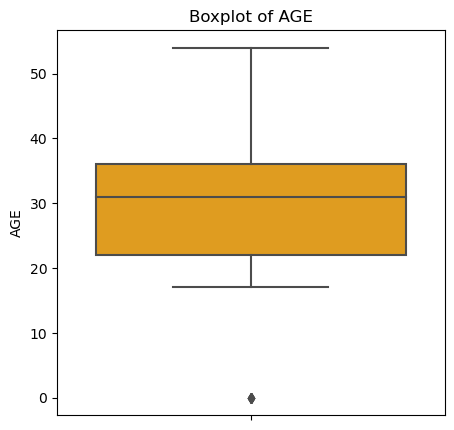

In [40]:
plt.figure(figsize=(5,5))
sns.boxplot(y=dfc['AGE'],color='orange')
plt.title('Boxplot of AGE')
plt.ylabel('AGE')
plt.show()

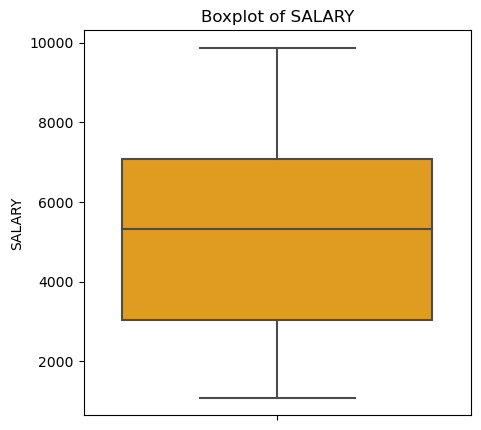

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(y=dfc['SALARY'],color='orange')
plt.title('Boxplot of SALARY')
plt.ylabel('SALARY')
plt.show()

#### <font color='green'> Using IQR method, finding the outlier 

In [43]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1=dfc['AGE'].quantile(0.25)
q3=dfc['AGE'].quantile(0.75)
iqr=q3-q1
lower_lim=q1-iqr*1.5
upper_lim=q3+iqr*1.5

print(f"Lower Limit: {lower_lim}, Upper Limit: {upper_lim}")

Lower Limit: 1.0, Upper Limit: 57.0


In [44]:
#Detecting outliers
outliers = dfc[(dfc['AGE'] < lower_lim) | (dfc['AGE'] > upper_lim)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 6


In [45]:
#Trimming method for removing outliers
dfc_cleaned=dfc[(dfc['AGE']>lower_lim) & (dfc['AGE']<upper_lim)]
print(f"Dataset after trimming: {dfc_cleaned.shape}")

Dataset after trimming: (138, 6)


In [46]:
#Detecting outliers
outliers = dfc_cleaned[(dfc_cleaned['AGE'] < lower_lim) | (dfc_cleaned['AGE'] > upper_lim)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 0


#### <font color='green'> Outliers in AGE is cleaned and saved as dfc_cleaned

In [48]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1=dfc['SALARY'].quantile(0.25)
q3=dfc['SALARY'].quantile(0.75)
iqr=q3-q1
low_lim=q1-iqr*1.5
up_lim=q3+iqr*1.5

print(f"Lower Limit: {low_lim}, Upper Limit: {up_lim}")

Lower Limit: -3013.5, Upper Limit: 13142.5


In [49]:
#Detecting outliers
outliers = dfc[(dfc['SALARY'] < low_lim) | (dfc['SALARY'] > up_lim)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 0


#### <font color='green'> There is no outlier for SALARY Column

#### Replace the value 0 in age as NaN


In [52]:
# Replace 0 with NaN in the 'Age' column
dfc['AGE'] = dfc['AGE'].replace(0, np.nan)

## Data Analysis: (Score : 2)

#### Filter the data with age >40 and salary<5000

In [55]:
print('Filtered data : \n')
filtered=dfc[(dfc['AGE']> 40) & (dfc['SALARY']<5000)]
filtered

Filtered data : 



,COMPANY,AGE,SALARY,CITY,COUNTRY,GENDER
21,Infosys,50.0,3184.0,Delhi,India,Female
32,Infosys,45.0,4034.0,Calcutta,India,Female
39,Infosys,41.0,3000.0,Mumbai,India,Female
50,Infosys,41.0,3000.0,Chennai,India,Female
57,Infosys,51.0,3184.0,Hyderabad,India,Female
68,Infosys,43.0,4034.0,Mumbai,India,Female
75,Infosys,44.0,3000.0,Cochin,India,Female
86,Infosys,41.0,3000.0,Delhi,India,Female
93,Infosys,54.0,3184.0,Mumbai,India,Female
104,Infosys,44.0,4034.0,Delhi,India,Female


#### Plot the chart with age and salary

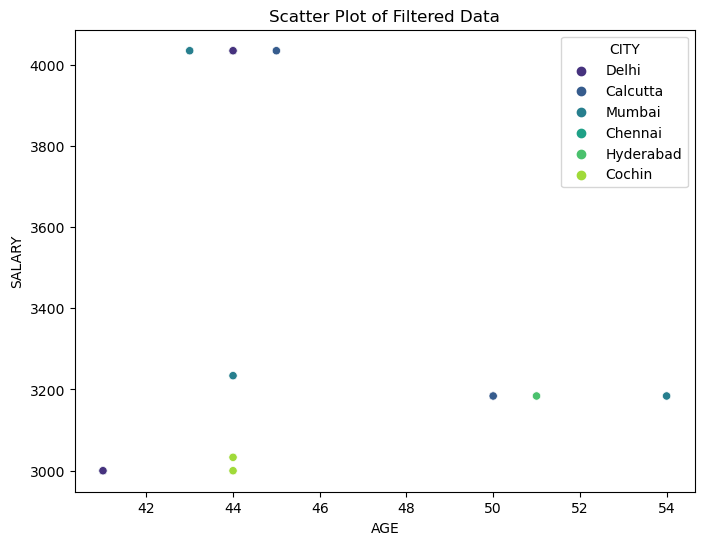

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered, x='AGE', y='SALARY', hue='CITY', palette='viridis')
plt.title('Scatter Plot of Filtered Data')
plt.xlabel('AGE')
plt.ylabel('SALARY')
plt.legend(title='CITY')
plt.show()

#### Count the number of people from each place and represent it visually


In [59]:
# Count the number of people from each place
place_count = dfc['CITY'].value_counts()
place_count

CITY
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

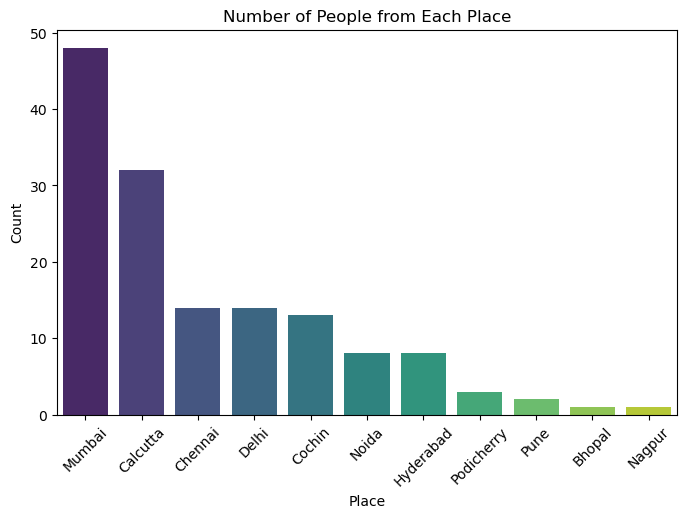

In [60]:
# Plot the counts
plt.figure(figsize=(8, 5))
sns.barplot(x=place_count.index, y=place_count.values, palette='viridis')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## Data Encoding: (Score : 2)

<font size="3">Convert categorical variables into numerical representations using techniques such as one-hot
encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
dfc.head(2)

,COMPANY,AGE,SALARY,CITY,COUNTRY,GENDER
0,TCS,20.0,5312.467742,Chennai,India,Female
1,Infosys,30.0,5312.467742,Mumbai,India,Female


In [114]:
# Apply Label Encoding
label_encoder = LabelEncoder()
dfc['AGE']=label_encoder.fit_transform(dfc['AGE'])
dfc['SALARY']=label_encoder.fit_transform(dfc['SALARY'])

In [116]:
print('Dataset after Label encoding for Nominal columns :\n')
dfc.head(3)

Dataset after Label encoding for Nominal columns :



,COMPANY,AGE,SALARY,CITY,COUNTRY,GENDER
0,4,3,21,2,0,0
1,2,10,21,6,0,0
2,4,15,3,1,0,0


In [118]:
# Apply One-Hot Encoding
one_hot_encoded = pd.get_dummies(dfc, columns=['CITY', 'COMPANY', 'COUNTRY','GENDER'], prefix=['CITY', 'COMPANY', 'COUNTRY','GENDER'])
print("One-Hot Encoded Data:")
print(one_hot_encoded)

One-Hot Encoded Data:
     AGE  SALARY  CITY_0  CITY_1  CITY_2  CITY_3  CITY_4  CITY_5  CITY_6  \
0      3      21   False   False    True   False   False   False   False   
1     10      21   False   False   False   False   False   False    True   
2     15       3   False    True   False   False   False   False   False   
3     19       5   False   False   False   False    True   False   False   
4      6      12   False   False   False   False   False   False    True   
..   ...     ...     ...     ...     ...     ...     ...     ...     ...   
142    5      33   False   False   False   False   False   False    True   
143   13      38   False    True   False   False   False   False   False   
145   22      13   False   False   False   False    True   False   False   
146   13      19   False   False   False   False   False   False    True   
147    5      33   False   False   False    True   False   False   False   

     CITY_7  ...  CITY_10  COMPANY_0  COMPANY_1  COMPANY_2  COMPA

## Feature Scaling: (Score : 2)
<font size=3>After the process of encoding, perform the scaling of the features using standardscaler and
minmaxscaler.


In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize StandardScaler and MinMaxScaler
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [124]:
# Select only the numerical columns i.e., 'AGE', 'SALARY'
numerical_columns = ['AGE', 'SALARY']
# Apply StandardScaler to numerical columns
dfc_standard_scaled = dfc.copy()
dfc_standard_scaled[numerical_columns] = standard_scaler.fit_transform(dfc_standard_scaled[numerical_columns])

# Applying MinMaxScaler to numerical columns
dfc_minmax_scaled = dfc.copy()
dfc_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(dfc_minmax_scaled[numerical_columns])

# Display the first few rows of the scaled data
print("Data after Standard Scaling:")
print(dfc_standard_scaled.head(10))

print("\nData after Min-Max Scaling:")
print(dfc_minmax_scaled.head(10))

Data after Standard Scaling:
   COMPANY       AGE    SALARY  CITY  COUNTRY  GENDER
0        4 -1.246731  0.139604     2        0       0
1        2 -0.312378  0.139604     6        0       0
2        4  0.355017 -1.368123     1        0       0
3        2  0.888933 -1.200598     4        0       0
4        4 -0.846294 -0.614259     6        0       0
5        2 -0.979773 -0.195446     1        0       0
6        4 -0.979773  0.558417     2        0       1
7        2 -0.846294  0.809705     6        0       1
8        4  0.221538  1.060993     1        0       1
9        0  1.422849  1.479806     4        0       0

Data after Min-Max Scaling:
   COMPANY       AGE  SALARY  CITY  COUNTRY  GENDER
0        4  0.107143   0.525     2        0       0
1        2  0.357143   0.525     6        0       0
2        4  0.535714   0.075     1        0       0
3        2  0.678571   0.125     4        0       0
4        4  0.214286   0.300     6        0       0
5        2  0.178571   0.425     1  

<font size=3 color='green'>Feature Scaling using MIN-MAX Scaling method and STANDARD Scaling method is done